In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Alameda County Jury Panels ##

In [2]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panel', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panel
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


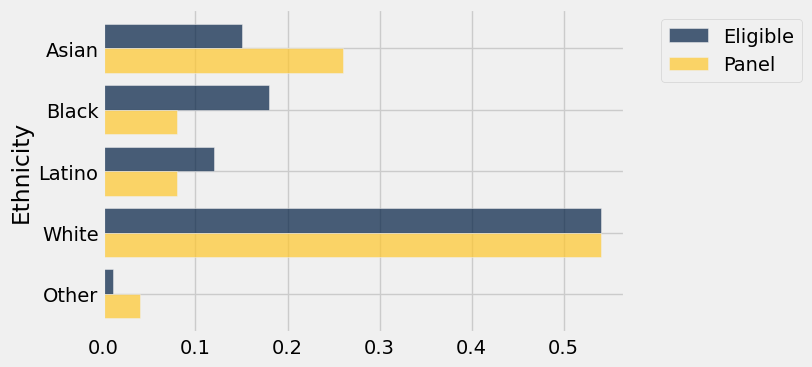

In [3]:
jury.barh('Ethnicity')

In [4]:
# Under the model, this is the true distribution of people
# from which the jurors are randomly sampled
model = jury.column('Eligible')
model

array([ 0.15,  0.18,  0.12,  0.54,  0.01])

In [5]:
# Let's simulate a random draw of 1423 jurors from this distribution
simulated = sample_proportions(1423, model)
simulated

array([ 0.15530569,  0.16303584,  0.13703443,  0.53267744,  0.01194659])

In [6]:
# The actual observed distribution (Panel) looks quite different
# from the simulation -- try running this several times to confirm!
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated

Ethnicity,Eligible,Panel,Simulated
Asian,0.15,0.26,0.155306
Black,0.18,0.08,0.163036
Latino,0.12,0.08,0.137034
White,0.54,0.54,0.532677
Other,0.01,0.04,0.0119466


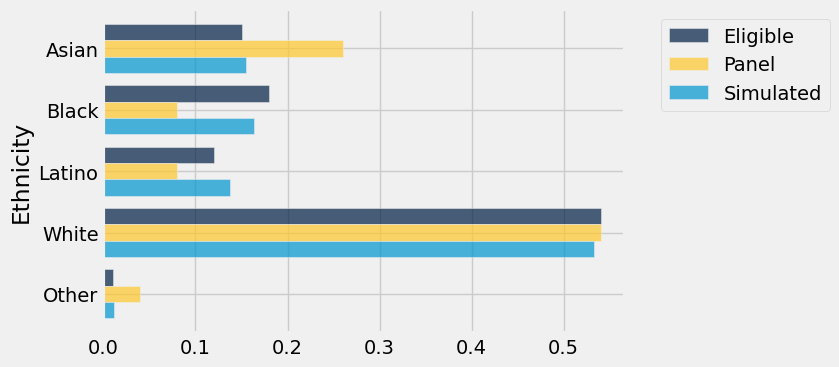

In [7]:
jury_with_simulated.barh('Ethnicity')

## Distance Between Distributions

In [8]:
# In the last lecture, the difference between observed black/purple
# and their expected values (26%/75%) was our statistic.
#
# In this case, we need to understand how each of the 5 categories
# differ from their expected values according to the model.

diffs = jury.column('Panel') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

Ethnicity,Eligible,Panel,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


In [9]:
sum(diffs)

2.7755575615628914e-17

## Total Variation Distance

In [10]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [11]:
# The TVD of our observed data (Panel) from their expected values
# assuming the model is true (Eligbible)
observed_tvd = tvd(jury.column('Panel'), jury.column('Eligible'))
observed_tvd

0.14000000000000001

In [12]:
# The TVD of a model simluation from its expected values
tvd(sample_proportions(1423, model), model)

0.0077371749824314828

In [13]:
def simulated_tvd():
    return tvd(sample_proportions(1423, model), model)

In [14]:
tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)

Observed TVD: 0.14


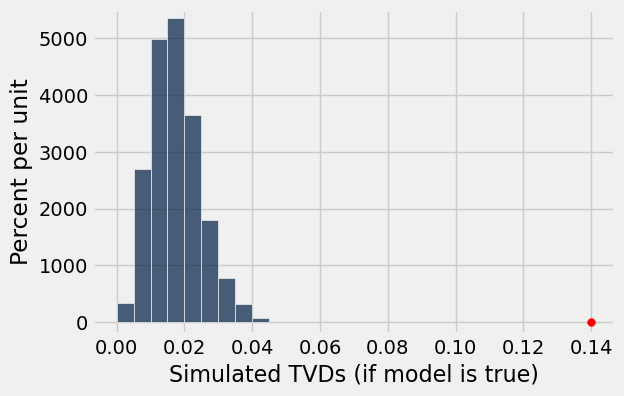

In [15]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

Table().with_column(title, tvds).hist(bins = bins)
print('Observed TVD: ' + str(observed_tvd))

# Plotting details; ignore this code
plots.ylim(-2, 55)
plots.scatter(observed_tvd, 0, color='red', s=30);